In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [24]:
df = pd.read_csv('noisy_curvefit_data.csv')
df

,x,y_noise_1,y_noise_2,y_noise_3,y_noise_4,y_noise_5
0,-1.000000,11.624419,8.296963,12.201067,7.811725,3.155566
1,-0.929293,10.377466,9.674440,12.198084,8.275006,7.518855
2,-0.858586,10.585100,9.251983,13.186565,12.926586,9.963630
3,-0.787879,10.913928,7.786344,12.552304,11.832379,9.625801
4,-0.717172,8.640287,8.551869,4.741432,8.790834,6.624113
...,...,...,...,...,...,...
95,5.717172,-1.411918,0.822231,-2.027132,-1.825106,2.746147
96,5.787879,0.344879,-1.718956,2.747559,-6.803779,-5.137472
97,5.858586,0.307133,0.353528,0.967976,5.461567,-0.905616
98,5.929293,0.048657,0.159961,2.482130,-0.414616,-4.334548


In [25]:
df.shape # 100 rows and 6 columns

(100, 6)

In [26]:
df.head(5)

,x,y_noise_1,y_noise_2,y_noise_3,y_noise_4,y_noise_5
0,-1.000000,11.624419,8.296963,12.201067,7.811725,3.155566
1,-0.929293,10.377466,9.674440,12.198084,8.275006,7.518855
2,-0.858586,10.585100,9.251983,13.186565,12.926586,9.963630
3,-0.787879,10.913928,7.786344,12.552304,11.832379,9.625801
4,-0.717172,8.640287,8.551869,4.741432,8.790834,6.624113


In [27]:
df.tail(5)

,x,y_noise_1,y_noise_2,y_noise_3,y_noise_4,y_noise_5
95,5.717172,-1.411918,0.822231,-2.027132,-1.825106,2.746147
96,5.787879,0.344879,-1.718956,2.747559,-6.803779,-5.137472
97,5.858586,0.307133,0.353528,0.967976,5.461567,-0.905616
98,5.929293,0.048657,0.159961,2.482130,-0.414616,-4.334548
99,6.000000,-0.193438,-2.244792,1.930035,4.992414,-6.872850


In [28]:
df.columns

Index(['x', 'y_noise_1', 'y_noise_2', 'y_noise_3', 'y_noise_4', 'y_noise_5'], dtype='object')

Fit: y = 4.71 * e^(-0.92 * x)
Reduced Chi-squared: 0.79


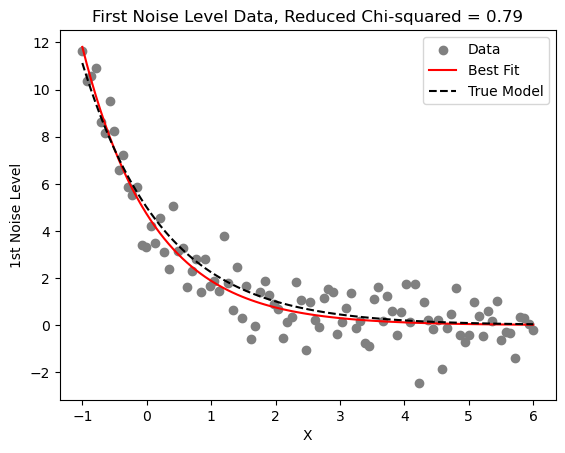

In [29]:
def model(x, A, k):
    return A * np.exp(-k * x)
p0 = [1, 1]
popt, pcov = curve_fit(model, df['x'], df['y_noise_1'], p0=p0)
A_fit, k_fit = popt
print(f"Fit: y = {A_fit:.2f} * e^(-{k_fit:.2f} * x)")
residuals = df['y_noise_1'] - model(df['x'], A_fit, k_fit)
chi2 = np.sum(residuals**2)
dof = len(df['x']) - len(popt)
chi2_reduced = chi2 / dof
print(f"Reduced Chi-squared: {chi2_reduced:.2f}")

plt.scatter(df['x'], df['y_noise_1'], label='Data', color='grey')
plt.plot(df['x'], model(df['x'], A_fit, k_fit), color='red', label='Best Fit')
plt.plot(df['x'], model(df['x'], 5, 0.8), 'k--', label='True Model')
plt.title('First Noise Level Data, Reduced Chi-squared = 0.79')
plt.xlabel('X')
plt.ylabel('1st Noise Level')

plt.legend()
plt.show()

Fit: y = 5.06 * e^(-0.73 * x)
Fit: y = 5.61 * e^(-0.87 * x)
Fit: y = 5.74 * e^(-0.73 * x)
Fit: y = 4.94 * e^(-0.70 * x)


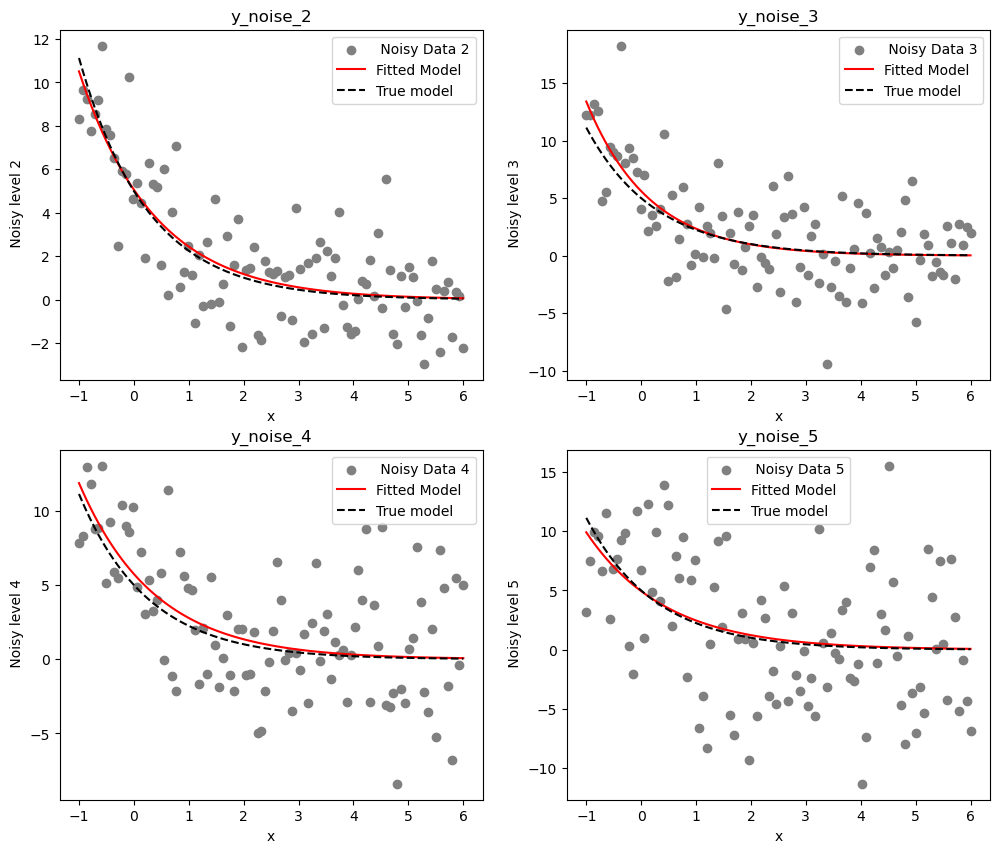

In [30]:
def fit_model(x, y):
    p0 = [1, 1]
    popt, pcov = curve_fit(model, x, y, p0=p0)
    A_fit, k_fit = popt
    residuals = y - model(x, A_fit, k_fit)
    chi2 = np.sum(residuals**2)
    dof = len(x) - len(popt)
    chi2_reduced = chi2 / dof
    return popt, chi2_reduced
figs, axes = plt.subplots(2, 2, figsize = (12, 10))
axes = axes.flatten()

y_noises = [df['y_noise_2'], df['y_noise_3'], df['y_noise_4'], df['y_noise_5']]
x = df['x']

for i, (ax, y_noise) in enumerate(zip(axes, y_noises), start=2):
    p0 = [1, 1]
    popt, pcov = curve_fit(model, x, y_noise, p0=p0)
    A_fit, k_fit = popt
    print(f"Fit: y = {A_fit:.2f} * e^(-{k_fit:.2f} * x)")
    
    ax.scatter(x, y_noise, color = 'gray', label = f' Noisy Data {i}')
    ax.plot(x, model(x, A_fit, k_fit), 'r-', label = 'Fitted Model')
    ax.plot(x, model(x, 5, 0.8), 'k--', label = 'True model')

    ax.set_title(f'y_noise_{i}')
    ax.set_xlabel('x')
    ax.set_ylabel(f' Noisy level {i}')
    ax.legend()

plt.show()

# as you increase the noise level the black and red line get closer together
# the reduced chi-squared gets higher - means that the model fits to the data is worse than the actual data

In [31]:
print(fit_model(x, df['y_noise_2']))
print(fit_model(x, df['y_noise_3']))
print(fit_model(x, df['y_noise_4']))
print(fit_model(x, df['y_noise_5']))

(array([5.0638887 , 0.73039626]), np.float64(3.6493823840389004))
(array([5.609396  , 0.87037195]), np.float64(10.41020728834891))
(array([5.73872674, 0.72596489]), np.float64(12.626832435376334))
(array([4.9434585 , 0.69501193]), np.float64(28.53812436906752))


In [41]:
noise_levels = ['y_noise_1', 'y_noise_2', 'y_noise_3', 'y_noise_4', 'y_noise_5']

A_fit = [4.71, 5.06, 5.61, 5.74, 4.94]
k_fit = [0.92, 0.73, 0.87, 0.73, 0.70]
reduced_chi_squared = [0.79, 3.65, 10.41, 12.63, 28.54]

new_df = pd.DataFrame({'noise_levels': noise_levels, 'A_fit': A_fit, 'k_fit': k_fit, 'reduced_chi_squared': reduced_chi_squared})

In [42]:
new_df

,noise_levels,A_fit,k_fit,reduced_chi_squared
0,y_noise_1,4.71,0.92,0.79
1,y_noise_2,5.06,0.73,3.65
2,y_noise_3,5.61,0.87,10.41
3,y_noise_4,5.74,0.73,12.63
4,y_noise_5,4.94,0.70,28.54


In [43]:
new_df.to_csv("noisy_parameters.csv", index=False)